In [51]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sir_spreading  import SIR_classical
from sir_spreading import SIR_threshold
from sir_spreading import SIR_cascade


In [52]:
def get_starting_nodes(G, method,n):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)    
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_n = sorted_nodes[:n]
        
    # Extract only the node IDs from the sorted list
    top_node_ids = [node for node, _ in top_n]

    return top_node_ids


Load graph.

In [53]:
G = nx.read_edgelist('M1/edges.csv', delimiter=',')

In [54]:
immune_nodes_degree = get_starting_nodes(G, 'degree', 100)
immune_nodes_closeness = get_starting_nodes(G, 'closeness', 100)
immune_nodes_betweenness = get_starting_nodes(G, 'betweenness', 100)

In [55]:
# Specify the number of random nodes you want
num_random_nodes = 10  # You can change this number as needed

#select one raqndom node:
random_node = random.choice([i for i in range(G.number_of_nodes())])

# Select multiple random nodes
random_nodes = random.sample(sorted(G.nodes()), num_random_nodes)

# Check that the set of random starting is not in the set of immunized nodes.
while (set(random_nodes) & set(immune_nodes_degree)) or (set(random_nodes) & set(immune_nodes_closeness)) or (set(random_nodes) & set(immune_nodes_betweenness)):
    random_nodes = random.sample(sorted(G.nodes()), num_random_nodes)

In [64]:
threshold_degree_immune_100 = SIR_threshold(G, kappa = 3, beta = 0.8, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_degree)
threshold_closeness_immune_100 = SIR_threshold(G ,kappa = 3, beta = 0.8, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_closeness)
threshold_between_immune_100 = SIR_threshold(G,kappa = 3,  beta = 0.8, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_betweenness)
threshold_degree = SIR_threshold(G, beta = 0.8,kappa = 3, gamma = 3,starting_nodes= random_nodes)

In [65]:
cascade_degree_immune_100 = SIR_cascade(G,  beta = 0.05, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_degree)
cascade_closeness_immune_100 = SIR_cascade(G , beta = 0.05, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_closeness)
cascade_between_immune_100 = SIR_cascade(G,  beta = 0.05, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_betweenness)
cascade_random = SIR_cascade(G, beta = 0.05, gamma = 3,starting_nodes= random_nodes)

In [66]:
classical_degree_immune_100 = SIR_classical(G,  beta = 0.3, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_degree)
classical_closeness_immune_100 = SIR_classical(G , beta = 0.3, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_closeness)
classical_between_immune_100 = SIR_classical(G,  beta = 0.3, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_betweenness)
classical_random = SIR_classical(G, beta = 0.3, gamma = 3,starting_nodes= random_nodes)

In [67]:
cascade_immunity = [
    cascade_degree_immune_100,
    cascade_closeness_immune_100,
    cascade_between_immune_100,
    cascade_random
]

In [68]:
threshold_immunity = [
    threshold_degree_immune_100,
    threshold_closeness_immune_100,
    threshold_between_immune_100,
    threshold_degree
]

In [69]:
classical_immunity = [
    classical_degree_immune_100,
    classical_closeness_immune_100,
    classical_between_immune_100,
    classical_random
]

In [70]:
data_frames = [classical_immunity, threshold_immunity, cascade_immunity]

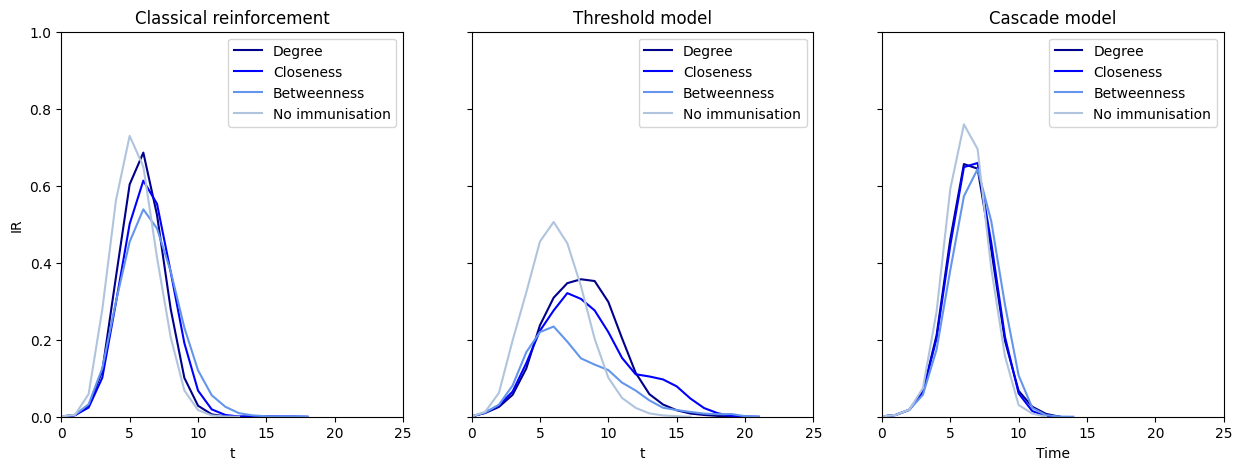

In [71]:
methods = ['Degree', 'Closeness', 'Betweenness','No immunisation']

# Define a custom color palette
custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']  # Add more colors if needed

# Set the size of the plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)  # Adjust the width and height as needed

# Create a graph with the different df's
for i, data_frame in enumerate(data_frames):
    for j, df_data in enumerate(data_frame):
        sns.lineplot(data=df_data, x='t', y='IR', label=f'{methods[j]}', color=custom_palette[j], ax=ax[i])

# Add legend
plt.legend()

# Add labels and title if needed
plt.xlabel('Time')
plt.ylabel('IR')

ax[0].set_title('Classical reinforcement')
ax[1].set_title('Threshold model')
ax[2].set_title('Cascade model')

# Set x and y axis limits
plt.xlim(0, 25)
plt.ylim(0, 1)
plt.savefig('Immunity.png')

# Show the plot
plt.show()